In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory


In [3]:
chess = pd.read_csv(".venv/Data/games.csv") #Data set for all the columns of the chess datasets
outcome = chess['victory_status'].value_counts()
turn = chess["turns"]
chess["time_control"] = chess["increment_code"].str.split("+").str[0].astype(int) # Creating a time control
conditions = [
    (chess["time_control"] <= 5),
    (chess["time_control"] > 5) & (chess["time_control"] < 30),
    (chess["time_control"] >= 30)
] #Creating the conditions for different time controls ("Blitz", "Rapid", "Long Rapid")
choices = ["Blitz", "Rapid", "Long Rapid"]
chess['rating'] = (chess['black_rating'] + chess['white_rating'])/2 #Making the rating the average of black and white's rating
conditions_level = [
    (chess["rating"] <= 1400),
    (chess["rating"] > 1400) & (chess["rating"] < 1800),
    (chess["rating"] >= 1800)
] #Creating the conditions to be at different levels ("Beginner", "Intermediate", "Advanced")
choices_level = ["Beginner", "Intermediate", "Advanced"]
chess['game_type'] = np.select(conditions, choices, default= "Unknown") #Creating a gametype column with either time controls ("Blitz", "Rapid", "Long Rapid")
time_outcome = chess.groupby(['victory_status', 'game_type']).size().unstack(fill_value = 0)
chess['level'] = np.select(conditions_level, choices_level, default='Unknown') #Creating the column for the different levels ("Beginner", "Intermediate", "Advanced")
level_order = ["Beginner", "Intermediate", "Advanced"]
chess["level"] = pd.Categorical(chess["level"], categories=level_order, ordered=True)
x = outcome.index
x

Index(['resign', 'mate', 'outoftime', 'draw'], dtype='object', name='victory_status')

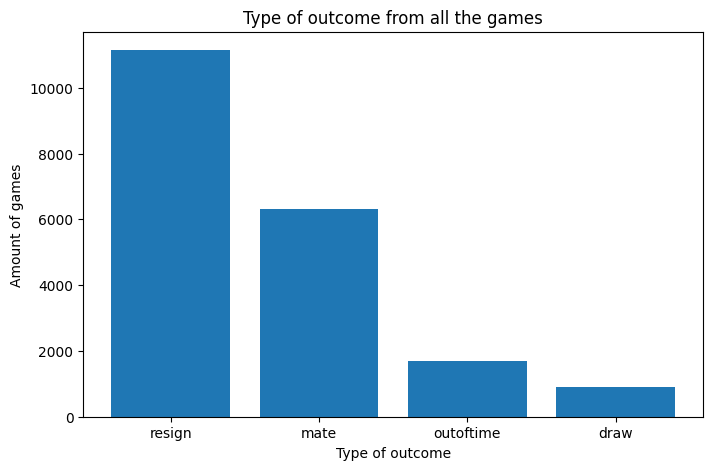

In [4]:
chess.head()
plt.figure(figsize=(8,5)) #Make the plot size 8 by 5
x = outcome.index
plt.bar(x, outcome.values) #Create the plot for the amount of different outcome : (ex: resign, mate, outoftime, draw)
plt.title("Type of outcome from all the games")
plt.xlabel("Type of outcome")
plt.ylabel("Amount of games")
plt.show()

In [5]:
chess.head()


,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply,time_control,rating,game_type,level
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5,15,1345.5,Rapid,Beginner
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4,5,1291.5,Blitz,Beginner
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3,5,1498.0,Blitz,Intermediate
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3,20,1446.5,Rapid,Intermediate
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5,30,1496.0,Long Rapid,Intermediate


C:\Users\desou\AppData\Local\Temp\ipykernel_28152\4179149533.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels = order )


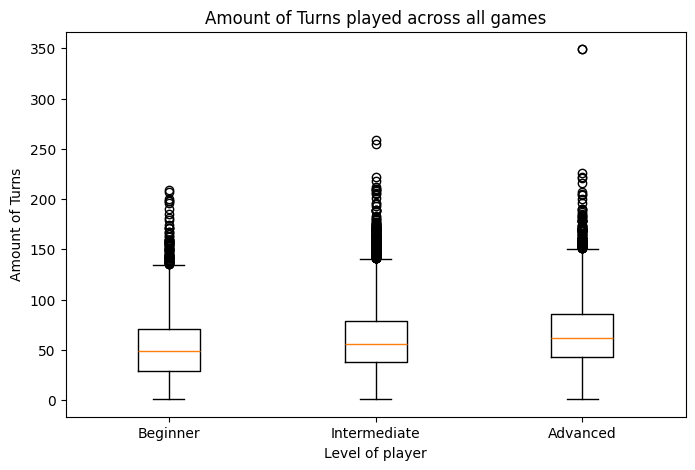

[0         13
 1         16
 5          5
 9        119
 10        39
         ... 
 20052     37
 20054     82
 20055     35
 20056    109
 20057     78
 Name: turns, Length: 4855, dtype: int64,
 2         61
 3         61
 4         95
 6         33
 7          9
         ... 
 20031     50
 20034    100
 20041     58
 20042     53
 20053     24
 Name: turns, Length: 10737, dtype: int64,
 78        47
 100      101
 102      135
 115       33
 117       90
         ... 
 20024    118
 20026     80
 20027     47
 20029     37
 20030     82
 Name: turns, Length: 4466, dtype: int64]

In [6]:
order = ['Beginner', "Intermediate","Advanced"]
data = [chess.loc[chess['level'] == lvl, "turns"] for lvl in order]
plt.figure(figsize = (8, 5))
plt.boxplot(data, labels = order )
plt.title("Amount of Turns played across all games")
plt.ylabel("Amount of Turns")
plt.xlabel("Level of player")
plt.show()
data

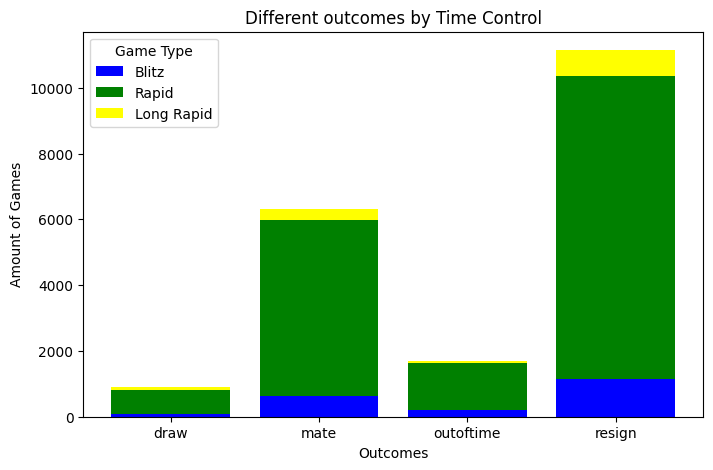

In [7]:
colors = {
    "Blitz": "blue",
    "Rapid": "green",
    "Long Rapid": "yellow"   
}  #Creating the 3 colors for the plot
labels = time_outcome.index #Creating the label for the different outcomes, (draw, mate, outoftime, resign)
x = range(len(labels))
#Choosing the size of the graph
plt.figure(figsize=(8, 5))

#Creating the first graph for blitz
plt.bar(x, time_outcome["Blitz"], color = colors["Blitz"], label = "Blitz")

#Creating graph for rapid, it will start right after the blitz, thats why its written bottom = time_ouctome["Blitz"]
plt.bar(x, time_outcome["Rapid"], bottom = time_outcome["Blitz"], color = colors["Rapid"], label = "Rapid")

plt.bar(x, time_outcome["Long Rapid"], bottom = time_outcome["Blitz"] + time_outcome['Rapid'], color = colors["Long Rapid"], label = "Long Rapid")
plt.title("Different outcomes by Time Control")

plt.legend(title = "Game Type")
plt.xlabel("Outcomes")
plt.ylabel("Amount of Games")

plt.xticks(x, labels)
plt.show()

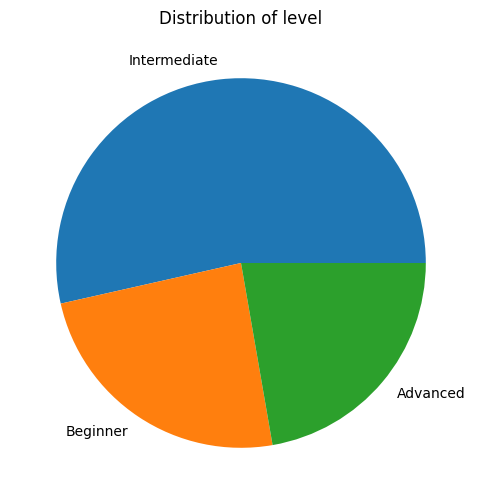

In [8]:
levels = chess["level"].value_counts()
plt.figure(figsize = (6, 6))
plt.pie(levels.values, labels = levels.index)
plt.title("Distribution of level")
plt.show()


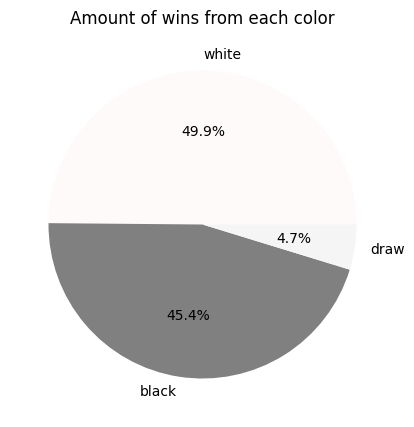

winner
white    49.860405
black    45.403330
draw      4.736265
Name: count, dtype: float64

In [9]:

total_game = len(chess)
winner = chess['winner'].value_counts()
percent_winner = (winner / total_game) * 100
plt.figure(figsize=(5,5))
plt.pie(percent_winner.values, 
        labels = percent_winner.index, 
        colors = ['snow', 'gray', 'whitesmoke'],
        autopct = '%1.1f%%'
       )
plt.title("Amount of wins from each color")

plt.show()
percent_winner

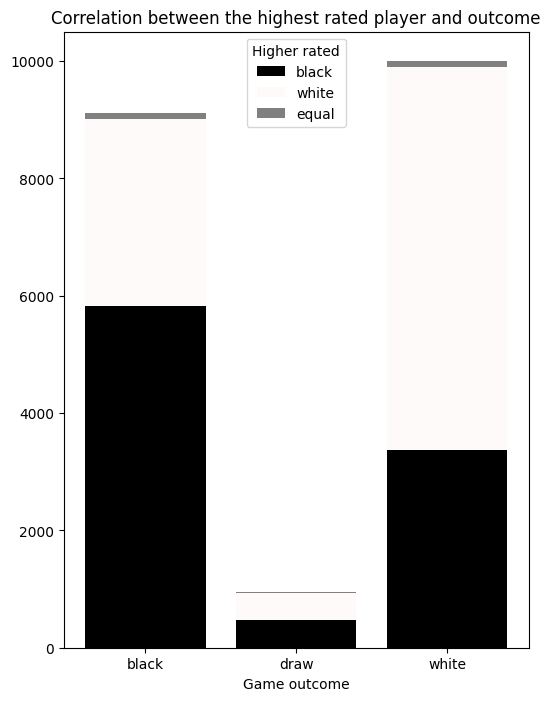

higher_rating,black,equal,white
winner,,,
black,5823,95,3189
draw,471,13,466
white,3377,95,6529


In [10]:
#Make a plot for the win in comparaison to the rating difference
#Rating diff is a number on every game, and is always positive
colors_win_rat = {
    'black' : "black",
    'white': 'snow',
    'equal': 'gray'
}
chess['higher_rating'] = np.where(
    chess['white_rating'] > chess['black_rating'], 'white',
    np.where(chess['black_rating'] > chess['white_rating'], 'black', 'equal')    
)
labels = ['black', 'draw', 'white']
x = range(len(labels))
winner_rating = chess.groupby(['winner', 'higher_rating']).size().unstack(fill_value = 0)
plt.figure(figsize=(6, 8))
plt.bar(x, winner_rating['black'], color = colors_win_rat['black'], label = 'black')
plt.bar(x, winner_rating['white'], bottom =  winner_rating['black'], color = colors_win_rat['white'], label = 'white')
plt.bar(x, winner_rating['equal'], bottom =  winner_rating['black'] + winner_rating['white'], color = colors_win_rat['equal'], label = 'equal')
plt.title("Correlation between the highest rated player and outcome")
plt.xlabel('Game outcome')
plt.xticks(x, labels)
plt.legend(title="Higher rated")
plt.show()
winner_rating

C:\Users\desou\AppData\Local\Temp\ipykernel_28152\2191446416.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  outcome_by_lvl = chess.groupby(['victory_status', "level"]).size().unstack()


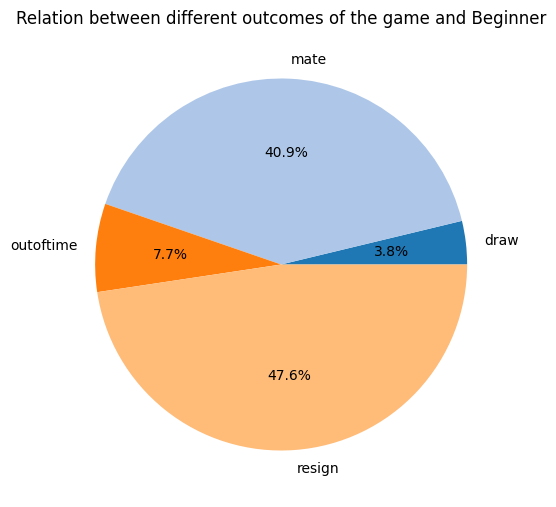

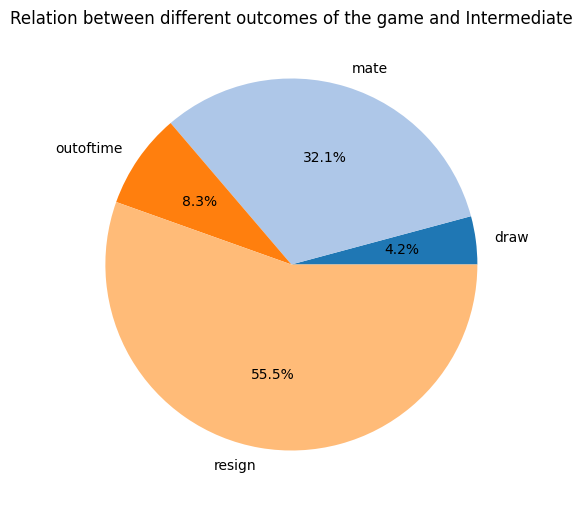

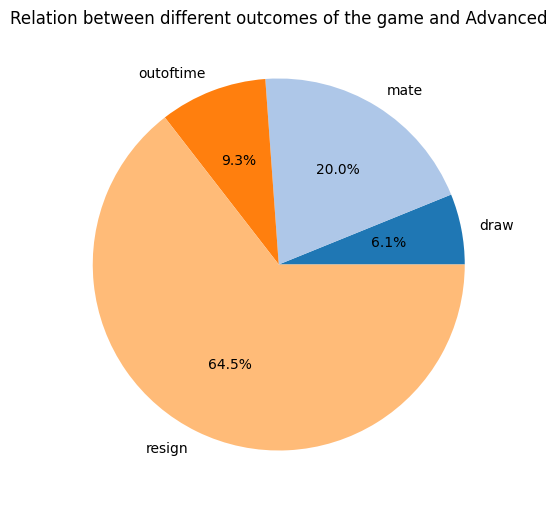

In [11]:
#Main Problem: "How do different player levels and time controls affect chess outcomes?"
#Variables at play: time_control, level, victory_status
outcome_by_lvl = chess.groupby(['victory_status', "level"]).size().unstack()
for lvl in outcome_by_lvl.columns:
    plt.figure(figsize=(6, 8))
    plt.pie(
        outcome_by_lvl[lvl], 
        labels=outcome_by_lvl.index,
        autopct = "%1.1f%%",
        colors = plt.cm.tab20.colors[:len(outcome_by_lvl)]
    )
    plt.title(f"Relation between different outcomes of the game and {lvl}")
    plt.show()


C:\Users\desou\AppData\Local\Temp\ipykernel_28152\3004776409.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  level_game_victory = chess.groupby(["level", "game_type", "victory_status"]).size().unstack(fill_value=0)


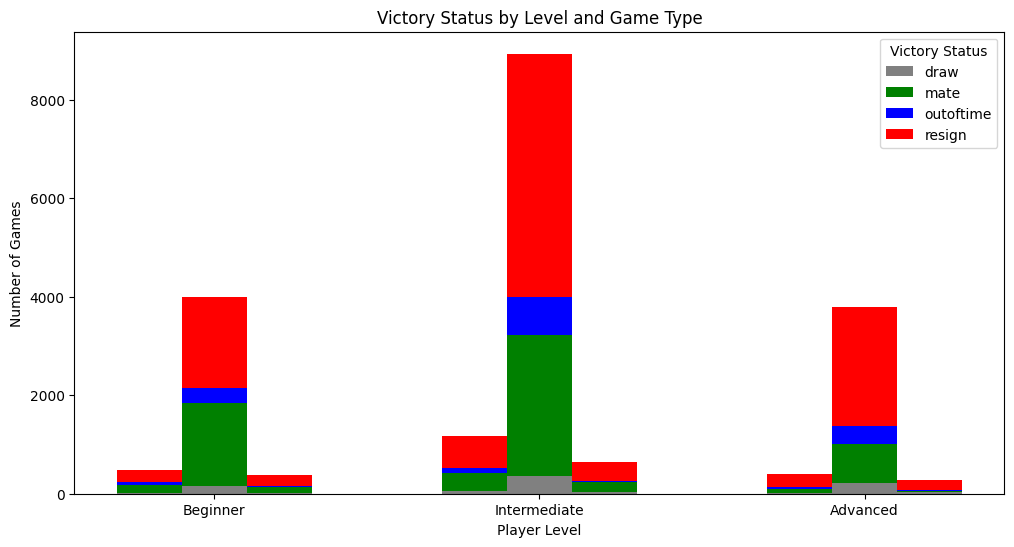

array([0, 1, 2])

In [12]:

# Step 1: Aggregate the data
level_game_victory = chess.groupby(["level", "game_type", "victory_status"]).size().unstack(fill_value=0)

# Step 2: Define variables
levels = level_game_victory.index.get_level_values(0).unique()
game_types = ['Blitz', 'Rapid', 'Long Rapid']
victory_statuses = level_game_victory.columns

# Step 3: Prepare bar positions
bar_width = 0.2
x = np.arange(len(levels))  # one position per level

# Step 4: Colors for victory_status
colors = {
    'mate': 'green',
    'resign': 'red',
    'outoftime': 'blue',
    'draw': 'gray'
}

plt.figure(figsize=(12,6))

# Step 5: Loop through game_types
for i, game in enumerate(game_types):
    bottom = np.zeros(len(levels))  # bottom for stacking
    for status in victory_statuses:
        # Get values for this game_type and status for all levels
        values = [level_game_victory.loc[(lvl, game), status] if (lvl, game) in level_game_victory.index else 0 for lvl in levels]
        # Plot bar
        plt.bar(x + i*bar_width, values, width=bar_width, bottom=bottom, color=colors[status], label=status if i==0 else "")
        bottom += np.array(values)  # update bottom for stacking

# Step 6: Labels and legend
plt.xticks(x + bar_width, levels)
plt.xlabel("Player Level")
plt.ylabel("Number of Games")
plt.title("Victory Status by Level and Game Type")
plt.legend(title="Victory Status")
plt.show()
level_game_victory
x

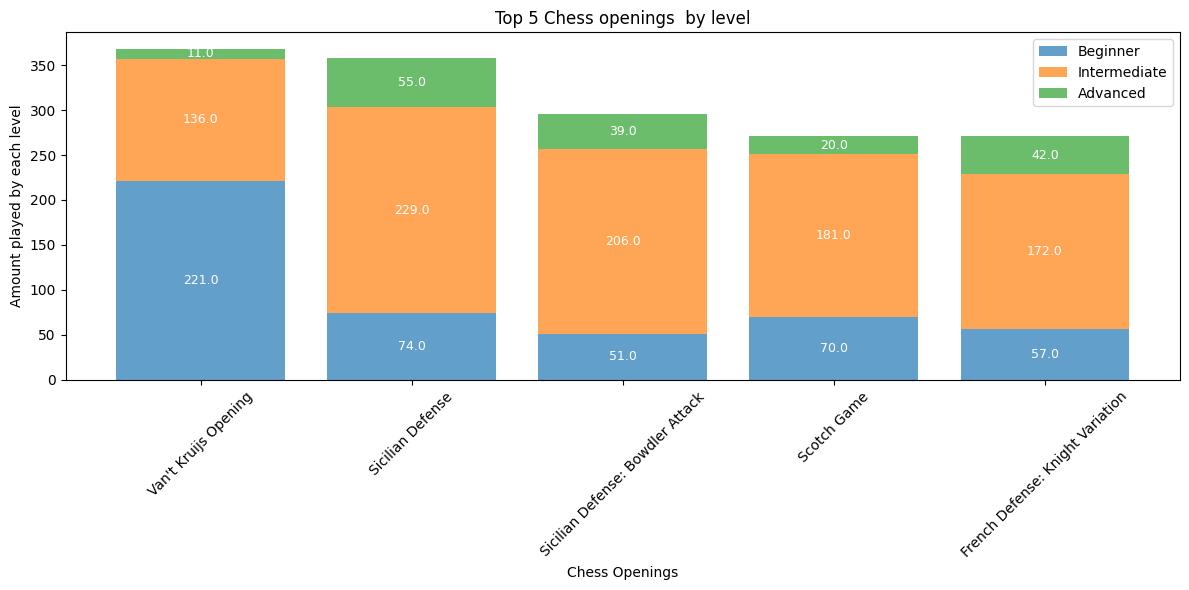

opening_name,Van't Kruijs Opening,Sicilian Defense,Sicilian Defense: Bowdler Attack,Scotch Game,French Defense: Knight Variation
level,,,,,
Beginner,221,74,51,70,57
Intermediate,136,229,206,181,172
Advanced,11,55,39,20,42


In [13]:
chess.head()
open_level = chess.groupby(['level', 'opening_name'], observed=True).size().unstack(fill_value = 0)
top_openings = open_level.sum().sort_values(ascending = False).head(5).index
open_leveltop5 = open_level[top_openings]

fig, ax = plt.subplots(figsize=(12, 6))

bottom = np.zeros(len(open_leveltop5.columns))
for level in open_leveltop5.index:
    bars = ax.bar(open_leveltop5.columns, open_leveltop5.loc[level], alpha = 0.7, label = level, bottom = bottom)

    for bar in bars:
        height = bar.get_height()
        if height > 0:
            ax.text(bar.get_x() + bar.get_width()/2,
                   bar.get_y() + height/2,
                    f'{height:.1f}', va = "center", ha = "center", color = 'white', fontsize = 9 )
    bottom += open_leveltop5.loc[level].values
    
ax.set_title("Top 5 Chess openings  by level")
ax.set_xlabel("Chess Openings")
ax.set_ylabel("Amount played by each level")
ax.legend()
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()
open_leveltop5

In [14]:
#Adding the percent distribution for each level in terms of openeing
open_level_percent = open_level.div(open_level.sum(axis=1), axis = 0) * 100

#Adding the average percent that an opening is played accross all levels
avg_percent = open_level_percent.mean(axis = 0)

distinct = open_level_percent.subtract(avg_percent, axis = 1)

top_5_by_level = {}
for level in distinct.index:
    top5 = open_level_percent.loc[level].sort_values(ascending = False).head(5)
    top_5_by_level[level] = top5

selected_openings = set().union(*[t.index for t in top_5_by_level.values()])
heapmap_data = distinct[selected_openings]


TypeError: Passing a set as an indexer is not supported. Use a list instead.

In [ ]:
distinct